1. Proceda à importação do ficheiro para um Pandas dataframe.

In [87]:
import pandas as pd

df = pd.read_csv("./portugal_ads_proprieties.csv")

1.5. Structucture analysis

In [88]:
print(df.shape)
print(df.columns)
print(df['Condition'].unique())
print(df['AdsType'].unique())
print(df['ProprietyType'].unique())
df = df.drop(columns=['ProprietyType'])
df = df[df['AdsType'] == 'Sell']
df = df[df['Price'] > 1000]
df = df[df['Condition'].notna()]

(62658, 8)
Index(['Location', 'Rooms', 'Price', 'Area', 'Bathrooms', 'Condition',
       'AdsType', 'ProprietyType'],
      dtype='object')
['Used' nan 'Renovated' 'New' 'Under construction' 'To recovery' 'In ruin']
['Rent' 'Sell' 'Vacation']
['House']


2. Mostre os 5 primeiros registos.

In [89]:
print(df.shape)
df.head()

(36194, 7)


,Location,Rooms,Price,Area,Bathrooms,Condition,AdsType
563,"Gafanha da Boa Hora, Vagos, Aveiro",3,385000.0,195.00,2.0,Under construction,Sell
564,"Sobrado e Bairros, Castelo de Paiva, Aveiro",5,350000.0,227.00,4.0,To recovery,Sell
565,"Santo André de Vagos, Vagos, Aveiro",3,300000.0,243.00,3.0,Under construction,Sell
566,"Santo André de Vagos, Vagos, Aveiro",3,300000.0,245.00,3.0,Under construction,Sell
569,"Beduído e Veiros, Estarreja, Aveiro",3,290000.0,124.14,2.0,Used,Sell


3. Mostre o coeficiente de correlação de pearson entre cada par de atributos. Liste os valores de correlação de forma descendente para um atributo à sua escolha.

In [90]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
example_attribute = "Price" if "Price" in correlation_matrix.columns else correlation_matrix.columns[0]
correlation_matrix[example_attribute].sort_values(ascending=False)

Price        1.000000
Bathrooms    0.169244
Area         0.002218
Name: Price, dtype: float64

4. Devolva a mediana de um atributo à sua escolha (restringindo a um conjunto de dados específico. Exemplo: a mediana da idade das pessoas do sexo feminino).

In [91]:
df[df['Location'].str.contains('Castelo Branco')]['Price'].median()

85000.0

5. Escreva o código que lhe permite contabilizar o número de registos null existente num conjunto de colunas à sua escolha.

In [92]:
missing_cols, missing_rows = (
    (df.isnull().sum(x) | df.eq('').sum(x))
    .loc[lambda x: x.gt(0)].index
    for x in (0, 1)
)

df.loc[missing_rows, missing_cols]


,Bathrooms
837,NaN
916,NaN
1437,NaN
2262,NaN
6160,NaN
...,...
59631,NaN
59775,NaN
60110,NaN
60112,NaN


6. Desenvolva uma função de imputação que proceda à substituição dos valores nulos de uma coluna à sua escolha com o valor da mediana desse atributo. Considere, sempre que possível, diferentes valores de mediana para cada classe (por exemplo, proceda à substituição dos valores nulos da coluna Age de acordo com a mediana da Age apurada para cada uma das três classes existentes (Pclass = 1, Pclass = 2, Pclass = 3)).

In [93]:
def impute_with_median_by_group(dataframe, column, group_by):
    median_per_group = dataframe.groupby(group_by)[column].median()
    general_median = dataframe[column].median()
    def apply_median(row):
        if pd.isna(row[column]):
            value = median_per_group.get(row[group_by], general_median)
            return value if not pd.isna(value) else 1
        return row[column]
    
    dataframe[column] = dataframe.apply(apply_median, axis=1)
    return dataframe

cleaned_df = impute_with_median_by_group(df.copy(), 'Bathrooms', 'Area')
print(cleaned_df[df['Bathrooms'].isna()][['Location', 'Area', 'Bathrooms']].head())

                                               Location   Area  Bathrooms
837       São João de Ver, Santa Maria da Feira, Aveiro  164.0        3.0
916                   Gafanha da Nazaré, Ílhavo, Aveiro  200.0        3.0
1437   Caldas de São Jorge e Pigeiros, Santa Maria d...   77.0        1.0
2262   Caldas de São Jorge e Pigeiros, Santa Maria d...  190.0        3.0
6160                                    Esporões, Braga  666.0        4.0


7. Crie novas colunas no seu dataset, potencialmente relacionadas com as colunas atuais (exemplo, a coluna Title (com os valores Mr; Miss; etc) a partir da coluna Name (que inclui os valores Mr. Santos; Miss Filipa).

In [94]:
cleaned_df['City'] = [s.rsplit(',', 1).pop() for s in cleaned_df['Location']]
print(cleaned_df['City'].unique())

[' Aveiro' ' Beja' ' Braga' ' Bragança' ' Castelo Branco' ' Coimbra'
 ' Évora' ' Faro' ' Guarda' ' Ilha da Graciosa' ' Ilha da Madeira'
 ' Ilha das Flores' ' Ilha de Porto Santo' ' Ilha de Santa Maria'
 ' Ilha de São Jorge' ' Ilha de São Miguel' ' Ilha do Corvo'
 ' Ilha do Faial' ' Ilha do Pico' ' Ilha Terceira' ' Leiria' ' Lisboa'
 ' Portalegre' ' Porto' ' Santarém' ' Setúbal' ' Viana do Castelo'
 ' Vila Real' ' Viseu']



8. Proceda a uma análise exploratória de dados que considere relevante no contexto do seu ficheiro.

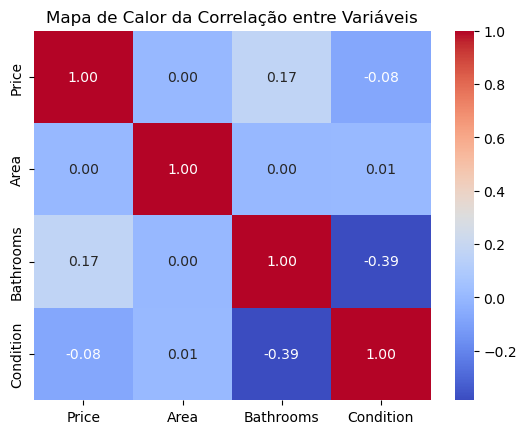

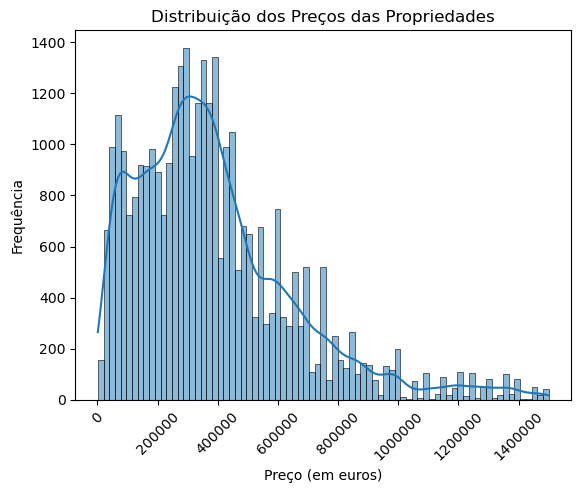

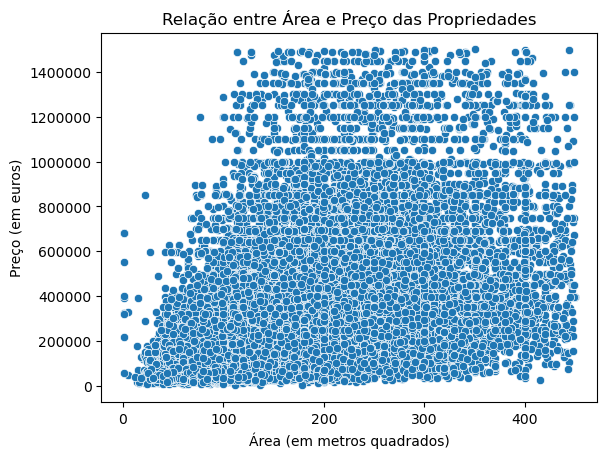

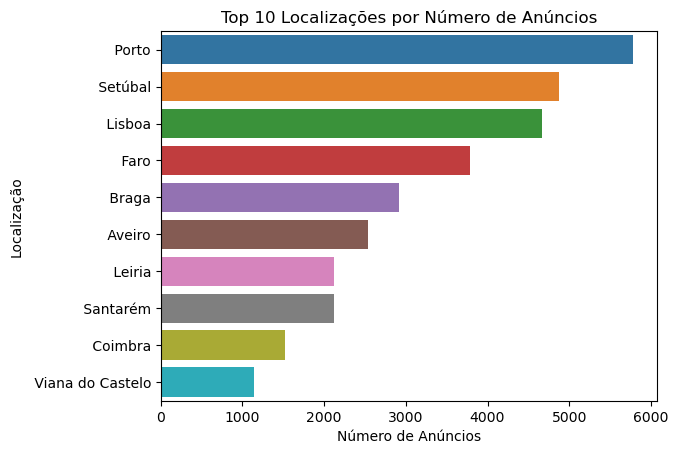

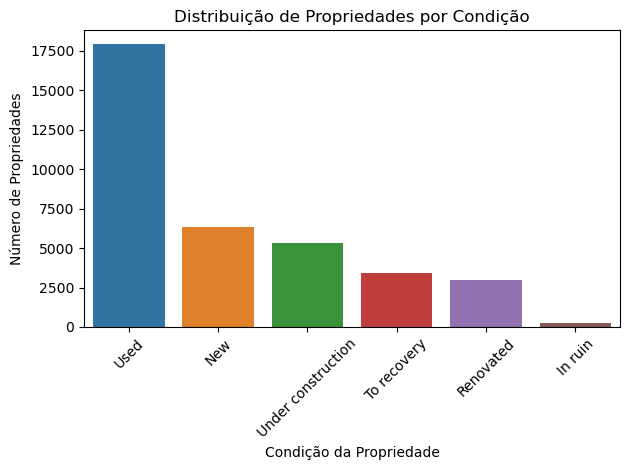

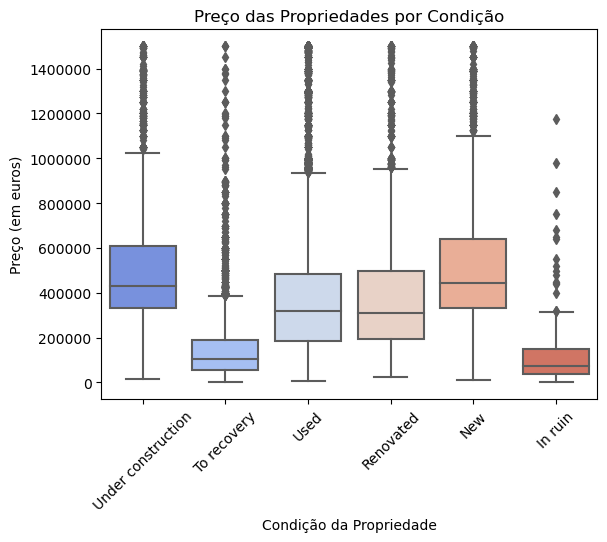

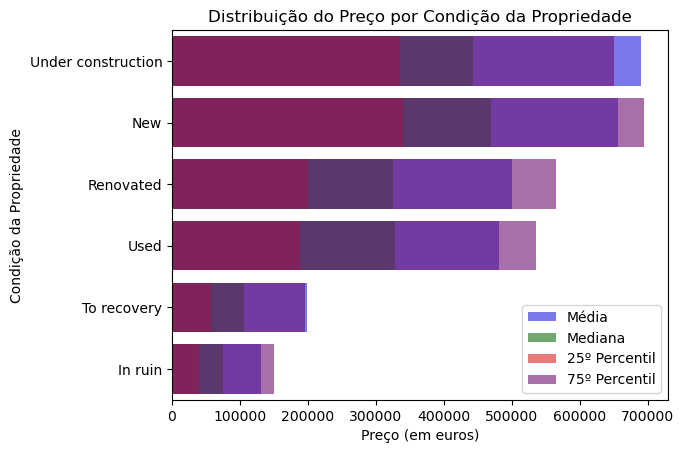

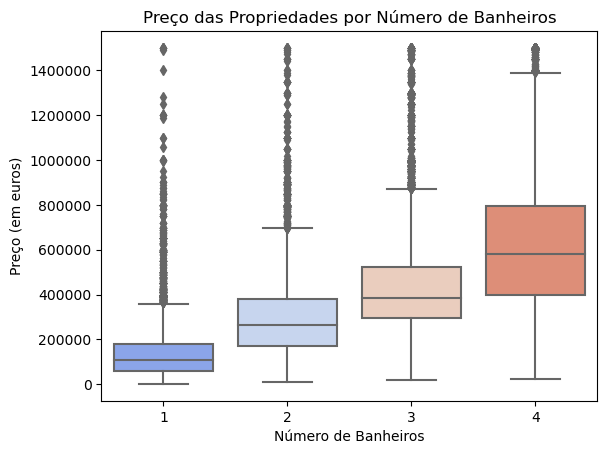

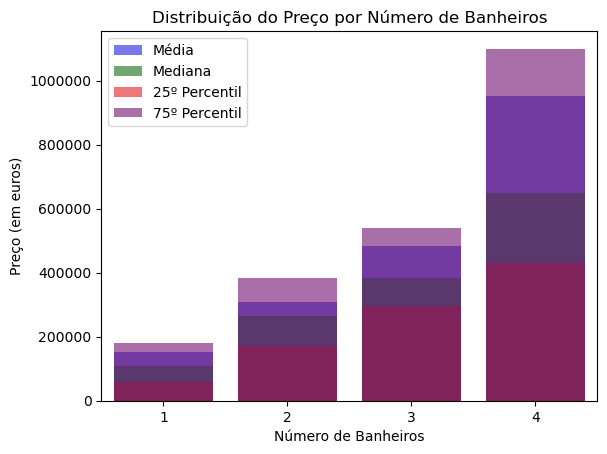

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

PRICE_LABEL = 'Preço (em euros)'
CONDITION_LABEL = 'Condição da Propriedade'

# Calculando a matriz de correlação
map = {
    'New': 1,
    'Under construction': 2,
    'Used': 3,
    'Renovated': 4,
    'To recovery': 5,
    'In ruin': 6
}
copy_df = cleaned_df.copy()
copy_df['Condition'] = [ map[c] for c in copy_df['Condition']]
correlation_matrix = copy_df.corr(numeric_only=True)
# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

# Filtrar valores extremos para melhor visualização
filtered_data = cleaned_df[(cleaned_df['Price'] < cleaned_df['Price'].quantile(0.95)) & (cleaned_df['Area'] < cleaned_df['Area'].quantile(0.95))]
# Histograma
sns.histplot(filtered_data['Price'], kde=True)
plt.title('Distribuição dos Preços das Propriedades')
plt.xlabel(PRICE_LABEL)
plt.ylabel('Frequência')
plt.ticklabel_format(style='plain', axis='x')  # Desativa a notação científica no eixo x
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor leitura
plt.show()

# Gráfico de dispersão
sns.scatterplot(x='Area', y='Price', data=filtered_data)
plt.title('Relação entre Área e Preço das Propriedades')
plt.ylabel(PRICE_LABEL)
plt.xlabel('Área (em metros quadrados)')
plt.ticklabel_format(style='plain', axis='y')  # Desativa a notação científica no eixo y
plt.show()

# Contagem de propriedades por localização (top 10)
top_locations = cleaned_df['City'].value_counts().head(10)
# Gráfico para as top 10 localizações por número de anúncios
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Localizações por Número de Anúncios')
plt.xlabel('Número de Anúncios')
plt.ylabel('Localização')
plt.show()

# Contagem de propriedades por condição
condition_counts = cleaned_df['Condition'].value_counts()
# Gráfico para a distribuição das condições das propriedades
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Distribuição de Propriedades por Condição')
plt.xlabel(CONDITION_LABEL)
plt.ylabel('Número de Propriedades')
plt.tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x para melhorar a visualização
plt.ticklabel_format(style='plain', axis='y')  # Desativa a notação científica no eixo y
plt.tight_layout()
plt.show()

# Filtrar valores extremos para melhor visualização
price_limit = cleaned_df['Price'].quantile(0.95)
condition_price_filtered = cleaned_df[cleaned_df['Price'] <= price_limit]
# Criar o boxplot
sns.boxplot(x='Condition', y='Price', data=condition_price_filtered, palette='coolwarm')
plt.title('Preço das Propriedades por Condição')
plt.xlabel(CONDITION_LABEL)
plt.ylabel(PRICE_LABEL)
plt.xticks(rotation=45)  # Rotacionar rótulos do eixo x para melhorar a visualização
plt.ticklabel_format(style='plain', axis='y')  # Desativa a notação científica no eixo y
plt.show()

# Agrupar os dados por 'Condition' e obter a distribuição do preço
price_distribution_by_condition = cleaned_df.groupby('Condition')['Price'].describe()
# Preparar os dados para o gráfico
price_stats_by_condition = price_distribution_by_condition[['mean', '50%', '25%', '75%']]
# Reordenar as condições pela média do preço em ordem descendente
price_stats_by_condition = price_stats_by_condition.sort_values(by='mean', ascending=False).reset_index()
# Plotar um gráfico de barras para cada estatística de preço por condição
# Média
sns.barplot(x='mean', y='Condition', data=price_stats_by_condition, color='blue', label='Média', alpha=0.6)
# Mediana
sns.barplot(x='50%', y='Condition', data=price_stats_by_condition, color='green', label='Mediana', alpha=0.6)
# Quartis
sns.barplot(x='25%', y='Condition', data=price_stats_by_condition, color='red', label='25º Percentil', alpha=0.6)
sns.barplot(x='75%', y='Condition', data=price_stats_by_condition, color='purple', label='75º Percentil', alpha=0.6)
plt.title('Distribuição do Preço por Condição da Propriedade')
plt.xlabel(PRICE_LABEL)
plt.ylabel(CONDITION_LABEL)
plt.legend()
plt.show()

# Filtrar valores extremos para melhor visualização
cleaned_df['Bathrooms'] = cleaned_df['Bathrooms'].astype(int)
price_limit = cleaned_df['Price'].quantile(0.95)
condition_price_filtered = cleaned_df[cleaned_df['Price'] <= price_limit]
# Criar o boxplot
sns.boxplot(x='Bathrooms', y='Price', data=condition_price_filtered, palette='coolwarm')
plt.title('Preço das Propriedades por Número de Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel(PRICE_LABEL)
plt.ticklabel_format(style='plain', axis='y')  # Desativa a notação científica no eixo y
plt.show()

# Agrupar os dados por 'Bathrooms' e calcular a distribuição de preços
price_distribution_by_bathrooms = cleaned_df.groupby('Bathrooms')['Price'].describe()
# Preparar os dados para o gráfico
# Focaremos nas estatísticas-chave para a distribuição de preços: média, mediana, e quartis
price_stats_by_bathrooms = price_distribution_by_bathrooms[['mean', '50%', '25%', '75%']]
# Ordenar pelo número de banheiros para a visualização
price_stats_by_bathrooms = price_stats_by_bathrooms.reset_index()
# Plotar um gráfico de barras para cada estatística de preço por número de banheiros
sns.barplot(x='Bathrooms', y='mean', data=price_stats_by_bathrooms, color='blue', label='Média', alpha=0.6)
sns.barplot(x='Bathrooms', y='50%', data=price_stats_by_bathrooms, color='green', label='Mediana', alpha=0.6)
sns.barplot(x='Bathrooms', y='25%', data=price_stats_by_bathrooms, color='red', label='25º Percentil', alpha=0.6)
sns.barplot(x='Bathrooms', y='75%', data=price_stats_by_bathrooms, color='purple', label='75º Percentil', alpha=0.6)
plt.title('Distribuição do Preço por Número de Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel(PRICE_LABEL)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # Desativa a notação científica no eixo y
plt.show()